In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

from pandas import DataFrame, Series

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline


In [25]:
# Let's create two df
df_1 = DataFrame(data={
    'Values': randn(100) + 2,  # changing the mean
    'Temp':'Hot'
})
df_1.head()

,Temp,Values
0,Hot,1.634064
1,Hot,0.903902
2,Hot,0.548728
3,Hot,1.809317
4,Hot,2.272735


In [24]:
# Let's create two df
df_2 = DataFrame(data={
    'Values': randn(100),
    'Temp':'Cold'
})
df_2.head()

,Temp,Values
0,Cold,1.048714
1,Cold,0.741823
2,Cold,0.432288
3,Cold,-0.432439
4,Cold,1.145273


In [29]:
new_df = pd.concat([df_1,df_2])
new_df.head()

,Temp,Values
0,Hot,1.634064
1,Hot,0.903902
2,Hot,0.548728
3,Hot,1.809317
4,Hot,2.272735


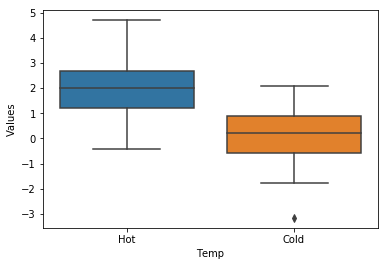

In [32]:
# Plotting two boxplots

sns.boxplot(x=new_df['Temp'],y=new_df['Values'])

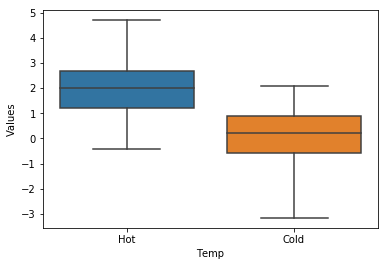

In [35]:
# Notice how the previous plot had outlier points, we can include those with the "whiskers"
sns.boxplot(x=new_df['Temp'],y=new_df['Values'],whis=np.inf)

In [36]:
# Let's create an example where a box plot doesn't give the whole picture


In [44]:
# Normal Distribution
df_1 = DataFrame(data={
    'Values': stats.norm(0,5).rvs(100),
    'Temp':'Cold'
})

df_1[:10].head()

,Temp,Values
0,Cold,9.697426
1,Cold,-12.657002
2,Cold,-4.232052
3,Cold,-1.923140
4,Cold,6.904050


In [45]:
# Two gamma distributions concatenated together (Second one is inverted)

df_2 = DataFrame(data={
    'Values': np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)]),
    'Temp':'Hot'
})

df_2.head()

,Temp,Values
0,Hot,2.895476
1,Hot,3.208095
2,Hot,8.319848
3,Hot,5.126942
4,Hot,4.995252


In [46]:
# new df
updated_df = pd.concat([df_1,df_2])
updated_df.head()

,Temp,Values
0,Cold,9.697426
1,Cold,-12.657002
2,Cold,-4.232052
3,Cold,-1.923140
4,Cold,6.904050


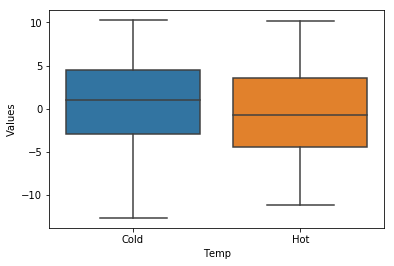

In [47]:
# Box plot them
sns.boxplot(x=updated_df['Temp'],y=updated_df['Values'],whis=np.inf)


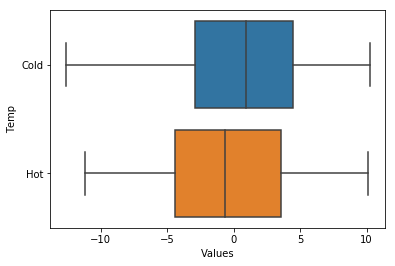

In [51]:
# vertical
sns.boxplot(y=updated_df['Temp'],x=updated_df['Values'],whis=np.inf)


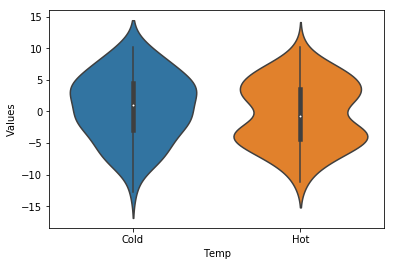

In [57]:
# From the above plots, you may think that the distributions are fairly similar
# But lets check out what a violin plot reveals
sns.violinplot(x=updated_df['Temp'],y=updated_df['Values'])

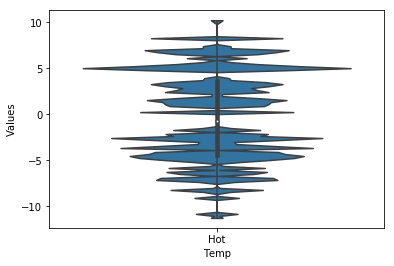

In [76]:
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
ser = updated_df[updated_df['Temp'] == 'Hot']
sns.violinplot(x=ser['Temp'],y=ser['Values'],bw=0.01)

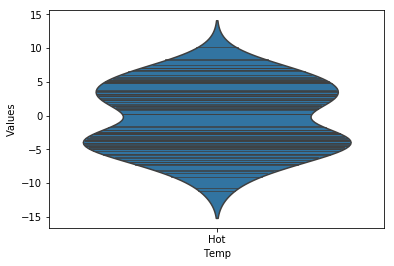

In [77]:
# We can also change the bandwidth of the kernel used for the density fit of the violin plots if desired
ser = updated_df[updated_df['Temp'] == 'Hot']
sns.violinplot(x=ser['Temp'],y=ser['Values'],inner="stick")